# PARTIAL EXAM

In [1]:
!ls

Scene-Recognition-with-Bag-of-Words env
Scene_Recognition.ipynb             requirements.txt


## Run the code

In [2]:
%cd Scene-Recognition-with-Bag-of-Words/code

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words/code


In [3]:
!ls

README.md                    nearest_neighbor_classify.py
__pycache__                  plot.png
build_vocabulary.py          proj3.py
build_vocabulary_brief.py    svm_classify.py
build_vocabulary_surf.py     test_image_feats.pkl
compare_features.py          test_image_feats_1.pkl
cv2_sift_utils.py            train_image_feats.pkl
get_bags_of_brief.py         train_image_feats_1.pkl
get_bags_of_sifts.py         visualize.py
get_bags_of_surf.py          visulizatoin.md
get_image_paths.py           vocab.pkl
get_tiny_images.py


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Instalar módulos personalizados
!pip install git+https://github.com/joelibaceta/pySURF.git
!pip install git+https://github.com/joelibaceta/pyBRIEF.git

  Cloning https://github.com/joelibaceta/pySURF.git to /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-q276gild
  Running command git clone --filter=blob:none --quiet https://github.com/joelibaceta/pySURF.git /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-q276gild
  Running command git clone --filter=blob:none --quiet https://github.com/joelibaceta/pySURF.git /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-q276gild
  Resolved https://github.com/joelibaceta/pySURF.git to commit bcbac2e6897e7770246df5f10d1ecfba32a258cd
  Installing build dependencies ...   Resolved https://github.com/joelibaceta/pySURF.git to commit bcbac2e6897e7770246df5f10d1ecfba32a258cd
  Installing build dependencies ... -done
  Getting requirements to build wheel ... one
  Getting requirements to build wheel ... -done
  Preparing metadata (pyproject.toml) ... one
  Preparing metadata (pyproject.toml) ... -done
done

[notice] A new release of pip 

Getting paths and labels for all train and test data
Accuracy =  0.7226666666666667
Kitchen: 0.65
Store: 0.52
Bedroom: 0.54
LivingRoom: 0.53
Office: 0.87
Industrial: 0.53
Suburb: 0.99
InsideCity: 0.76
TallBuilding: 0.76
Street: 0.73
Highway: 0.81
OpenCountry: 0.61
Coast: 0.81
Mountain: 0.83
Forest: 0.9
Accuracy =  0.7226666666666667
Kitchen: 0.65
Store: 0.52
Bedroom: 0.54
LivingRoom: 0.53
Office: 0.87
Industrial: 0.53
Suburb: 0.99
InsideCity: 0.76
TallBuilding: 0.76
Street: 0.73
Highway: 0.81
OpenCountry: 0.61
Coast: 0.81
Mountain: 0.83
Forest: 0.9


/Users/joelibaceta/Projects/examen-parcial-computer-vision/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


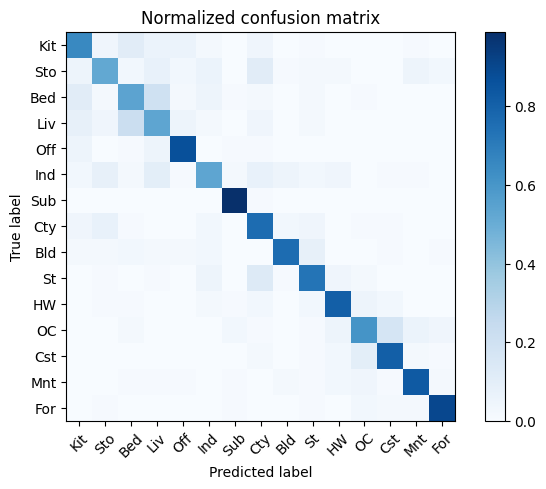

In [6]:
# SIFT + SVM
import sys
sys.argv = ['proj3.py', '--feature', 'bag_of_sift', '--classifier', 'support_vector_machine']
exec(open('proj3.py').read())

## Comparación de Descriptores: SIFT vs SURF vs BRIEF

Vamos a comparar el rendimiento de tres tipos de descriptores diferentes usando el clasificador SVM:

1. **SIFT (OpenCV)**: Scale-Invariant Feature Transform
2. **SURF (pySURF)**: Speeded-Up Robust Features - Tu implementación
3. **BRIEF (pyBRIEF)**: Binary Robust Independent Elementary Features - Tu implementación

Todos usarán:
- Bag of Words con vocabulario de 400 palabras visuales
- Clasificador SVM lineal
- Mismo conjunto de datos (15 categorías de escenas)

In [14]:
# Importar librerías necesarias
import numpy as np
import pickle
from pathlib import Path
import time
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from pysurf import PySurf
from pybrief import PyBrief

### Paso 1: Cargar datos de entrenamiento y prueba

In [15]:
# Cargar datos
import glob
import os

DATA_DIR = '../data'

# Obtener rutas de imágenes de entrenamiento y prueba
train_image_paths = []
train_labels = []
test_image_paths = []
test_labels = []

# Cargar imágenes de entrenamiento
train_dir = os.path.join(DATA_DIR, 'train')
for category in sorted(os.listdir(train_dir)):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_file in glob.glob(os.path.join(category_path, '*.jpg')):
            train_image_paths.append(img_file)
            train_labels.append(category)

# Cargar imágenes de prueba
test_dir = os.path.join(DATA_DIR, 'test')
for category in sorted(os.listdir(test_dir)):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for img_file in glob.glob(os.path.join(category_path, '*.jpg')):
            test_image_paths.append(img_file)
            test_labels.append(category)

print(f'Imágenes de entrenamiento: {len(train_image_paths)}')
print(f'Imágenes de prueba: {len(test_image_paths)}')
print(f'Categorías: {sorted(set(train_labels))}')

Imágenes de entrenamiento: 1500
Imágenes de prueba: 2985
Categorías: ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


### Paso 2: Evaluar SIFT (OpenCV)

In [ ]:
# Evaluar SIFT
print("Evaluando SIFT...")
start_time = time.time()

# Construir vocabulario
from build_vocabulary import build_vocabulary
vocab_sift = build_vocabulary(train_image_paths, vocab_size=400)

# Guardar vocabulario para get_bags_of_sifts
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab_sift, f)

Evaluando SIFT...
Extract SIFT features


In [ ]:

# Obtener representaciones Bag of Words
from get_bags_of_sifts import get_bags_of_sifts
train_image_feats_sift = get_bags_of_sifts(train_image_paths)
test_image_feats_sift = get_bags_of_sifts(test_image_paths)

# Entrenar clasificador SVM
classifier_sift = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
classifier_sift.fit(train_image_feats_sift, train_labels)

In [ ]:

# Predecir
predictions_sift = classifier_sift.predict(test_image_feats_sift)
accuracy_sift = accuracy_score(test_labels, predictions_sift)
cm_sift = confusion_matrix(test_labels, predictions_sift)

time_sift = time.time() - start_time
print(f"SIFT - Precisión: {accuracy_sift:.4f} - Tiempo: {time_sift:.2f}s")

### Paso 3: Evaluar SURF (pySURF)

In [ ]:
# Evaluar SURF
print("Evaluando SURF...")
start_time = time.time()

# Construir vocabulario
from build_vocabulary_surf import build_vocabulary_surf
vocab_surf = build_vocabulary_surf(train_image_paths, vocab_size=400)

# Guardar vocabulario para get_bags_of_surf
with open('vocab_surf.pkl', 'wb') as f:
    pickle.dump(vocab_surf, f)

# Obtener representaciones Bag of Words
from get_bags_of_surf import get_bags_of_surf
train_image_feats_surf = get_bags_of_surf(train_image_paths, vocab_file='vocab_surf.pkl')
test_image_feats_surf = get_bags_of_surf(test_image_paths, vocab_file='vocab_surf.pkl')

# Entrenar clasificador SVM
classifier_surf = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
classifier_surf.fit(train_image_feats_surf, train_labels)

# Predecir
predictions_surf = classifier_surf.predict(test_image_feats_surf)
accuracy_surf = accuracy_score(test_labels, predictions_surf)
cm_surf = confusion_matrix(test_labels, predictions_surf)

time_surf = time.time() - start_time
print(f"SURF - Precisión: {accuracy_surf:.4f} - Tiempo: {time_surf:.2f}s")

### Paso 4: Evaluar BRIEF (pyBRIEF)

In [ ]:
# Evaluar BRIEF
print("Evaluando BRIEF...")
start_time = time.time()

# Construir vocabulario
from build_vocabulary_brief import build_vocabulary_brief
vocab_brief = build_vocabulary_brief(train_image_paths, vocab_size=400)

# Guardar vocabulario para get_bags_of_brief
with open('vocab_brief.pkl', 'wb') as f:
    pickle.dump(vocab_brief, f)

# Obtener representaciones Bag of Words
from get_bags_of_brief import get_bags_of_brief
train_image_feats_brief = get_bags_of_brief(train_image_paths, vocab_file='vocab_brief.pkl')
test_image_feats_brief = get_bags_of_brief(test_image_paths, vocab_file='vocab_brief.pkl')

# Entrenar clasificador SVM
classifier_brief = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
classifier_brief.fit(train_image_feats_brief, train_labels)

# Predecir
predictions_brief = classifier_brief.predict(test_image_feats_brief)
accuracy_brief = accuracy_score(test_labels, predictions_brief)
cm_brief = confusion_matrix(test_labels, predictions_brief)

time_brief = time.time() - start_time
print(f"BRIEF - Precisión: {accuracy_brief:.4f} - Tiempo: {time_brief:.2f}s")

### Paso 5: Comparación de Resultados

In [ ]:
# Comparación de precisión
fig, ax = plt.subplots(figsize=(10, 6))
methods = ['SIFT', 'SURF', 'BRIEF']
accuracies = [accuracy_sift, accuracy_surf, accuracy_brief]
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = ax.bar(methods, accuracies, color=colors, alpha=0.7)
ax.set_ylabel('Precisión', fontsize=12)
ax.set_title('Comparación de Precisión: SIFT vs SURF vs BRIEF', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nResumen:")
print(f"SIFT:  {accuracy_sift:.4f} ({time_sift:.2f}s)")
print(f"SURF:  {accuracy_surf:.4f} ({time_surf:.2f}s)")
print(f"BRIEF: {accuracy_brief:.4f} ({time_brief:.2f}s)")

### Paso 6: Matrices de Confusión

In [ ]:
# Visualizar las tres matrices de confusión
categories = sorted(set(test_labels))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# SIFT
sns.heatmap(cm_sift, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories, ax=axes[0])
axes[0].set_title(f'SIFT\nPrecisión: {accuracy_sift:.4f}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# SURF
sns.heatmap(cm_surf, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories, yticklabels=categories, ax=axes[1])
axes[1].set_title(f'SURF\nPrecisión: {accuracy_surf:.4f}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

# BRIEF
sns.heatmap(cm_brief, annot=True, fmt='d', cmap='Reds',
            xticklabels=categories, yticklabels=categories, ax=axes[2])
axes[2].set_title(f'BRIEF\nPrecisión: {accuracy_brief:.4f}', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicción')
axes[2].set_ylabel('Real')

plt.tight_layout()
plt.show()

In [ ]:
%cd ..

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words
